# Beta Distribution

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import beta

# Generate sample data from a beta distribution
np.random.seed(0)
a, b = 2.0, 5.0
data = beta.rvs(a, b, size=1000)

# Define the negative log-likelihood function
def neg_log_likelihood(params, data):
    a, b = params
    return -np.sum(beta.logpdf(data, a, b))

# Initial guesses for a and b
initial_params = np.array([1.0, 1.0])

# Perform the minimization
result = minimize(neg_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))

# Extract the estimated parameters
a_mle, b_mle = result.x

print(f'Estimated parameters: a = {a_mle:.4f}, b = {b_mle:.4f}')

Estimated parameters: a = 2.0589, b = 4.9703


# MLE for Beta Distribution

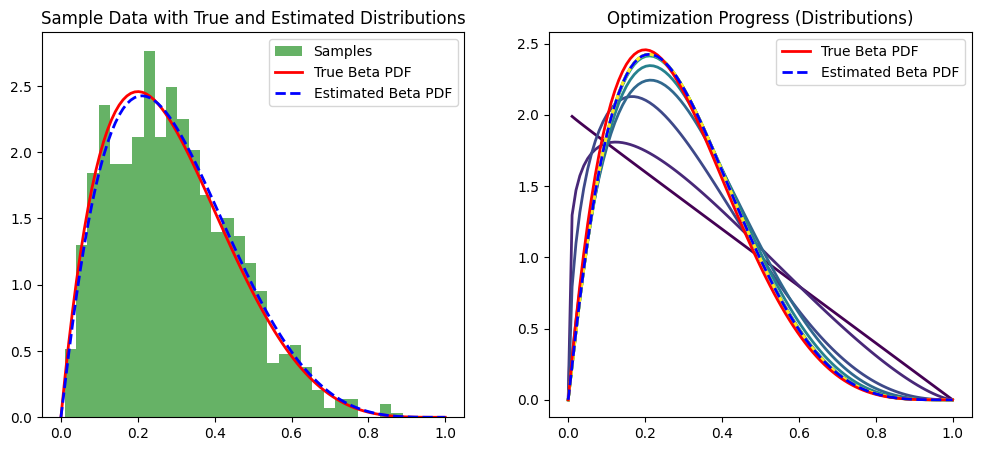

Estimated parameters: a = 2.0589, b = 4.9703


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import beta
import matplotlib.cm as cm

# Generate sample data from a beta distribution
np.random.seed(0)
a, b = 2.0, 5.0
data = beta.rvs(a, b, size=1000)

# Define the negative log-likelihood function
def neg_log_likelihood(params, data):
    a, b = params
    return -np.sum(beta.logpdf(data, a, b))

# Initial guesses for a and b
initial_params = np.array([1.0, 1.0])

# Store the optimization progress
progress = []

def callback(params):
    progress.append(params)

# Perform the minimization
result = minimize(neg_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)), callback=callback)

# Extract the estimated parameters
a_mle, b_mle = result.x

# Plot the distribution, samples, and optimization procedure
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the sample data
ax[0].hist(data, bins=30, density=True, alpha=0.6, color='g', label='Samples')
ax[0].set_title('Sample Data with True and Estimated Distributions')
ax[0].plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True Beta PDF')
ax[0].plot(x, beta.pdf(x, a_mle, b_mle), 'b--', lw=2, label='Estimated Beta PDF')
ax[0].legend()

# Plot the optimization progress as overlayed distributions
colors = cm.viridis(np.linspace(0, 1, len(progress)))
for i, params in enumerate(progress):
    a_prog, b_prog = params
    ax[1].plot(x, beta.pdf(x, a_prog, b_prog), color=colors[i], lw=2, alpha=1.)
ax[1].plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True Beta PDF')
ax[1].plot(x, beta.pdf(x, a_mle, b_mle), 'b--', lw=2, label='Estimated Beta PDF')
ax[1].set_title('Optimization Progress (Distributions)')
ax[1].legend()

plt.show()

print(f'Estimated parameters: a = {a_mle:.4f}, b = {b_mle:.4f}')

# Weighted MLE for Beta Distribution

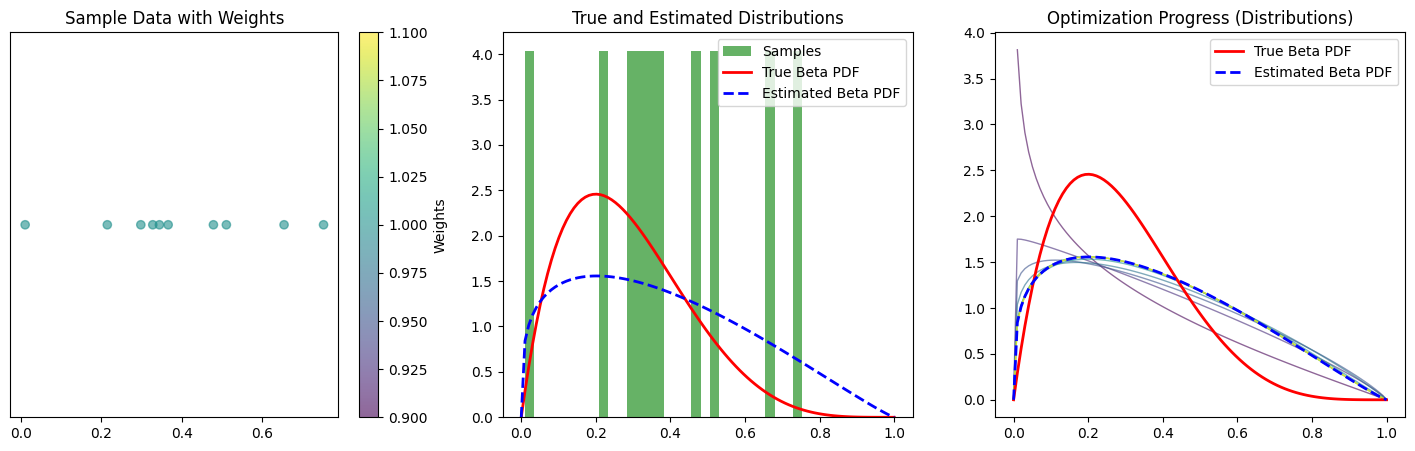

Estimated parameters: a = 1.2866, b = 2.1307


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import beta
import matplotlib.cm as cm

# Generate sample data from a beta distribution
np.random.seed(0)
a, b = 2.0, 5.0
data = beta.rvs(a, b, size=1000)

# Define weights for the data points
weights = np.random.rand(len(data))

# Define the negative weighted log-likelihood function
def neg_log_likelihood(params, data, weights):
    a, b = params
    return -np.sum(weights * beta.logpdf(data, a, b))

# Initial guesses for a and b
initial_params = np.array([1.0, 1.0])

# Store the optimization progress
progress = []

def callback(params):
    progress.append(params)

# Perform the minimization
result = minimize(neg_log_likelihood, initial_params, args=(data, weights), method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)), callback=callback)

# Extract the estimated parameters
a_mle, b_mle = result.x

# Plot the distribution, samples, and optimization procedure
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot the sample data with weights
sc = ax[0].scatter(data, np.zeros_like(data), c=weights, cmap='viridis', alpha=0.6)
ax[0].set_title('Sample Data with Weights')
ax[0].set_yticks([])  # Hide y-axis
plt.colorbar(sc, ax=ax[0], label='Weights')

# Plot the true and estimated distributions
ax[1].hist(data, bins=30, density=True, alpha=0.6, color='g', label='Samples')
ax[1].set_title('True and Estimated Distributions')
ax[1].plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True Beta PDF')
ax[1].plot(x, beta.pdf(x, a_mle, b_mle), 'b--', lw=2, label='Estimated Beta PDF')
ax[1].legend()

# Plot the optimization progress as overlayed distributions
colors = cm.viridis(np.linspace(0, 1, len(progress)))
for i, params in enumerate(progress):
    a_prog, b_prog = params
    ax[2].plot(x, beta.pdf(x, a_prog, b_prog), color=colors[i], lw=1, alpha=0.6)
ax[2].plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True Beta PDF')
ax[2].plot(x, beta.pdf(x, a_mle, b_mle), 'b--', lw=2, label='Estimated Beta PDF')
ax[2].set_title('Optimization Progress (Distributions)')
ax[2].legend()

plt.show()

print(f'Estimated parameters: a = {a_mle:.4f}, b = {b_mle:.4f}')

# Scaled Beta Distribution

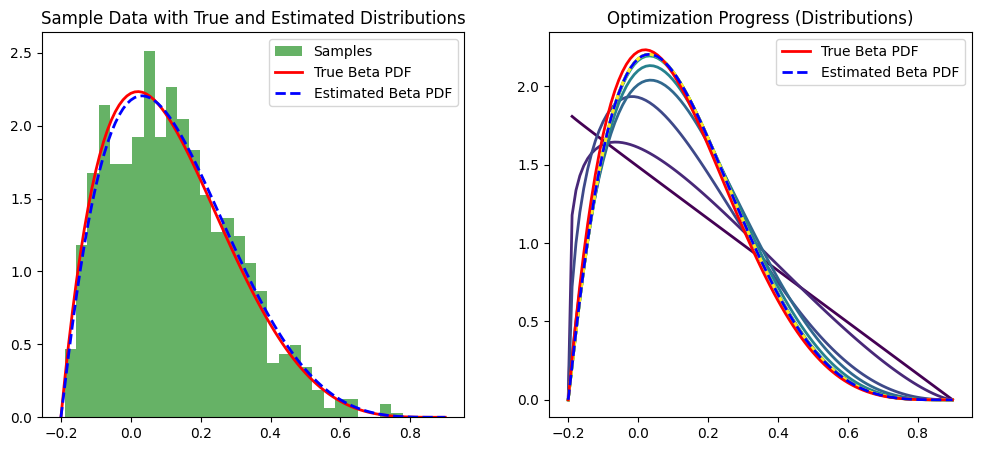

Estimated parameters: a = 2.0589, b = 4.9703


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import beta
import matplotlib.cm as cm

# Define the range for scaling
x_min, x_max = -0.2, 0.9

# Generate sample data from a scaled beta distribution
np.random.seed(0)
a, b = 2.0, 5.0
data = x_min + beta.rvs(a, b, size=1000) * (x_max - x_min)

# Transform data to [0, 1] interval
scaled_data = (data - x_min) / (x_max - x_min)

# Define the negative log-likelihood function for the scaled beta distribution
def neg_log_likelihood(params, data):
    a, b = params
    return -np.sum(beta.logpdf(data, a, b))

# Initial guesses for a and b
initial_params = np.array([1.0, 1.0])

# Store the optimization progress
progress = []

def callback(params):
    progress.append(params)

# Perform the minimization
result = minimize(neg_log_likelihood, initial_params, args=(scaled_data,), method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)), callback=callback)

# Extract the estimated parameters
a_mle, b_mle = result.x

# Plot the distribution, samples, and optimization procedure
x = np.linspace(0, 1, 100)
scaled_x = x_min + x * (x_max - x_min)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the sample data
ax[0].hist(data, bins=30, density=True, alpha=0.6, color='g', label='Samples')
ax[0].set_title('Sample Data with True and Estimated Distributions')
ax[0].plot(scaled_x, beta.pdf(x, a, b) / (x_max - x_min), 'r-', lw=2, label='True Beta PDF')
ax[0].plot(scaled_x, beta.pdf(x, a_mle, b_mle) / (x_max - x_min), 'b--', lw=2, label='Estimated Beta PDF')
ax[0].legend()

# Plot the optimization progress as overlayed distributions
colors = cm.viridis(np.linspace(0, 1, len(progress)))
for i, params in enumerate(progress):
    a_prog, b_prog = params
    ax[1].plot(scaled_x, beta.pdf(x, a_prog, b_prog) / (x_max - x_min), color=colors[i], lw=2, alpha=1.0)
ax[1].plot(scaled_x, beta.pdf(x, a, b) / (x_max - x_min), 'r-', lw=2, label='True Beta PDF')
ax[1].plot(scaled_x, beta.pdf(x, a_mle, b_mle) / (x_max - x_min), 'b--', lw=2, label='Estimated Beta PDF')
ax[1].set_title('Optimization Progress (Distributions)')
ax[1].legend()

plt.show()

print(f'Estimated parameters: a = {a_mle:.4f}, b = {b_mle:.4f}')

# Comparison to Gaussian

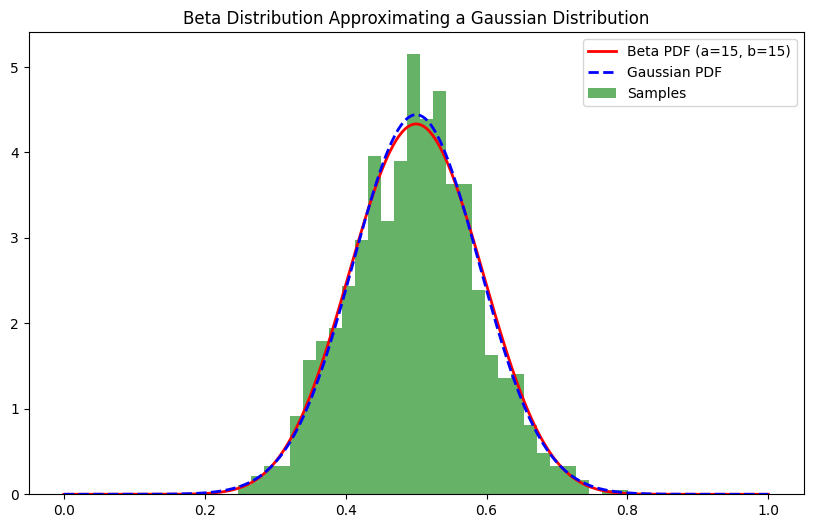

Mean: 0.5000, Standard Deviation: 0.0898


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# Parameters for the Beta distribution
a, b = 15, 15

# Generate a sample from the Beta distribution
np.random.seed(0)
data = beta.rvs(a, b, size=1000)

# Plot the Beta distribution and a Gaussian distribution with the same mean and variance
x = np.linspace(0, 1, 1000)
beta_pdf = beta.pdf(x, a, b)
mean = a / (a + b)
variance = (a * b) / ((a + b) ** 2 * (a + b + 1))
std_dev = np.sqrt(variance)
gaussian_pdf = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, beta_pdf, 'r-', lw=2, label=f'Beta PDF (a={a}, b={b})')
plt.plot(x, gaussian_pdf, 'b--', lw=2, label='Gaussian PDF')
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Samples')
plt.title('Beta Distribution Approximating a Gaussian Distribution')
plt.legend()
plt.show()

print(f'Mean: {mean:.4f}, Standard Deviation: {std_dev:.4f}')